In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv(r'C:\Users\Siranjeevi C\Data Science - Python\Suicide\master.csv')

In [4]:
#data processing
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [5]:
df.index

RangeIndex(start=0, stop=27820, step=1)

In [6]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [7]:
df.fillna('HDI for year', inplace = True)

In [8]:
df.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024EBB5B4A90>,
      dtype=object)

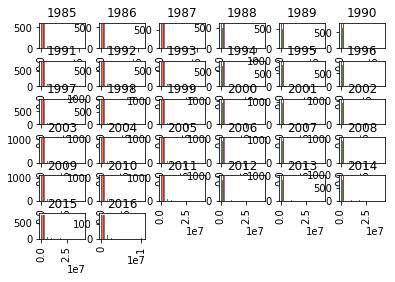

In [20]:
df.hist(by ='year') 

In [9]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,HDI for year,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,HDI for year,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,HDI for year,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,HDI for year,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,HDI for year,"2,156,624,900",796,Boomers


In [10]:
df['country'].value_counts()

Mauritius                 382
Austria                   382
Netherlands               382
Iceland                   382
Israel                    372
Malta                     372
Republic of Korea         372
Brazil                    372
Puerto Rico               372
Chile                     372
Colombia                  372
Belgium                   372
Singapore                 372
Ecuador                   372
Mexico                    372
Italy                     372
Spain                     372
Luxembourg                372
Japan                     372
Argentina                 372
United States             372
United Kingdom            372
Greece                    372
Costa Rica                360
Bulgaria                  360
Norway                    360
Ireland                   360
Guatemala                 360
France                    360
Australia                 360
                         ... 
Switzerland               252
Bahrain                   252
Estonia   

In [11]:
df = df.drop(['country-year','HDI for year'], axis = 1)

In [12]:
df.isnull().sum()
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [12]:
#to set in independent and depentdent variable
x = df.iloc[0:100,[4]]
y = df.iloc[0:100,[5,6]]

In [13]:
x,y

(       suicides_no
 26932         2573
 1770            96
 9609             3
 4014             0
 20256          675
 24346           18
 1840           182
 9000             2
 9292          1817
 17035           12
 11207            1
 7201            20
 24131           10
 6123             3
 26106         2003
 1834           166
 25230          145
 19476          105
 16128            0
 9335           128
 26469            6
 25485            1
 24184            1
 909             30
 5619            58
 10191           83
 14849           11
 5159           415
 24681          273
 24381          298
 ...            ...
 23301           16
 15979           11
 17417          117
 17885           54
 18049           90
 1793           186
 1908           437
 9411          2903
 10141            0
 14931           22
 27454           56
 20717          175
 10476            0
 17640           92
 21933            1
 243              0
 6605            11
 6686           113


In [14]:
#to split train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 3)

In [15]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [16]:
#creating regression object
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
# Make predictions using the testing set
y_pred = regr.predict(x_test)

In [18]:
print('coefficient',regr.coef_)
print('intercept',regr.intercept_)

coefficient [[1.83402196e+03]
 [2.68892249e-02]]
intercept [7.78331213e+05 8.50688542e+00]


In [19]:
# The mean squared error
# MSE = 1/n(yactual- ypredicted)2
print("MSE: %.2f"
      % mean_squared_error(y_test,y_pred))

MSE: 1185288844407.08


In [20]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test,y_pred))
r2_score(y_test,y_pred)

Variance score: 0.10


0.10418452205291151

ValueError: color kwarg must have one color per data set. 25 data sets and 1 colors were provided

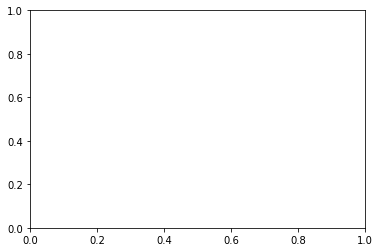

In [23]:
#Plot outputs
plt.hist(y_test, color='Red')
plt.hist(y_pred, color='Blue')

Text(0.5, 1.0, 'Residual Plot')

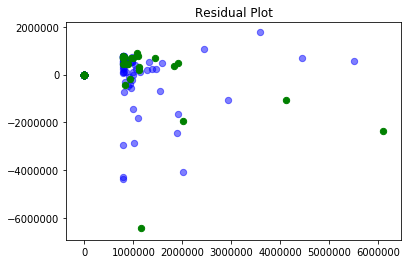

In [22]:
plt.scatter(regr.predict(x_train),regr.predict( x_train)- y_train, c= 'b', s=40, alpha = 0.5)
plt.scatter(regr.predict(x_test), regr.predict(x_test)-y_test, c='g', s=40)
plt.hlines(y= 0, xmin = 0, xmax= 50)
plt.title('Residual Plot')